1. Install dependancies

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

2. keypoints using MP Hollistic

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic

def draw_landmarks(image, results):
  """
  Draws the detected landmarks on the input image.

  Args:
    image: The input image (in BGR format).
    results: The results of MediaPipe Holistic processing.

  Returns:
    The image with drawn landmarks.
  """

  # Draw face landmarks (use mp_holistic.FACEMESH_TESSELATION for better visualization)
  mp_drawing.draw_landmarks(
      image, 
      results.face_landmarks, 
      mp_holistic.FACEMESH_TESSELATION, 
      mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1), 
      mp_drawing.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1)
  )

  # Draw pose landmarks
  mp_drawing.draw_landmarks(
      image, 
      results.pose_landmarks, 
      mp_holistic.POSE_CONNECTIONS,
      mp_drawing.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4), 
      mp_drawing.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2)
  )

  # Draw left-hand landmarks
  mp_drawing.draw_landmarks(
      image, 
      results.left_hand_landmarks, 
      mp_holistic.HAND_CONNECTIONS,
      mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4), 
      mp_drawing.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=2)
  )

  # Draw right-hand landmarks
  mp_drawing.draw_landmarks(
      image, 
      results.right_hand_landmarks, 
      mp_holistic.HAND_CONNECTIONS,
      mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4), 
      mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
  )

  return image

In [7]:
def draw_styled_landmarks(image, results):
    # Face connections (Blue-ish)
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(0, 128, 255), thickness=1, circle_radius=1),  # Blue
                             mp_drawing.DrawingSpec(color=(0, 128, 255), thickness=1, circle_radius=1)  # Blue
                             ) 

    # Pose connections (Red-ish)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=2, circle_radius=4),  # Red
                             mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=2, circle_radius=2)  # Red
                             ) 

    # Left hand connections (Blue-ish)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(0, 128, 255), thickness=2, circle_radius=4),  # Blue
                             mp_drawing.DrawingSpec(color=(0, 128, 255), thickness=2, circle_radius=2)  # Blue
                             ) 

    # Right hand connections (Red-ish)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=2, circle_radius=4),  # Red
                             mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=2, circle_radius=2)  # Red
                             )

In [8]:
mp_holistic.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [9]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [10]:
len(results.left_hand_landmarks.landmark)

21

In [11]:
results

mediapipe.python.solution_base.SolutionOutputs

In [12]:
draw_landmarks(frame, results)

array([[[150, 150, 150],
        [150, 150, 150],
        [151, 151, 151],
        ...,
        [183, 183, 180],
        [185, 183, 179],
        [185, 182, 178]],

       [[152, 151, 151],
        [152, 151, 151],
        [152, 151, 151],
        ...,
        [183, 183, 180],
        [185, 184, 180],
        [187, 185, 181]],

       [[151, 150, 150],
        [151, 150, 150],
        [151, 150, 150],
        ...,
        [183, 184, 181],
        [185, 185, 181],
        [185, 185, 181]],

       ...,

       [[ 58,  59,  65],
        [ 58,  60,  65],
        [ 57,  59,  64],
        ...,
        [149, 134, 132],
        [148, 133, 131],
        [148, 133, 131]],

       [[ 57,  61,  63],
        [ 57,  61,  64],
        [ 57,  61,  64],
        ...,
        [148, 132, 129],
        [147, 132, 129],
        [147, 132, 129]],

       [[ 57,  63,  63],
        [ 57,  62,  64],
        [ 57,  62,  64],
        ...,
        [148, 131, 128],
        [148, 132, 129],
        [147, 133, 129]]

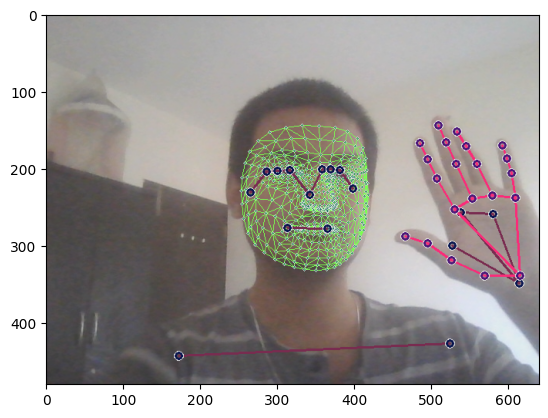

In [13]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

3. Extract Keypoint Values

In [14]:
len(results.left_hand_landmarks.landmark)

21

In [15]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [16]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [17]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
face

array([ 0.55784738,  0.56486303, -0.03541847, ...,  0.6255424 ,
        0.43309456,  0.040385  ])

In [18]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [19]:
result_test = extract_keypoints(results)

In [20]:
result_test

array([ 0.53448719,  0.48934442, -0.97482711, ...,  0.        ,
        0.        ,  0.        ])

In [21]:
468*3+33*4+21*3+21*3

1662

In [22]:
468*3+33*4+21*3+21*3

1662

In [23]:
np.save('0', result_test)

In [24]:
np.load('0.npy')

array([ 0.53448719,  0.48934442, -0.97482711, ...,  0.        ,
        0.        ,  0.        ])

4. Setup folders for collection

In [25]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [26]:
# hello
## 0
## 1
## 2
## ...
## 29
# thanks

# I love you

In [27]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

5. Collect Keypoint Values for Training and Testing

In [28]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

6. Preprocess Data and Create Labels and features

7. Build and Train LSTM Neural Network

8. Make Predictions

9. Save weights

10. Evaluation using Confusion Matrix and Accuracy

11. Test in Real Time